## Import Libraries

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Get the Data

In [28]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Missing Data Check

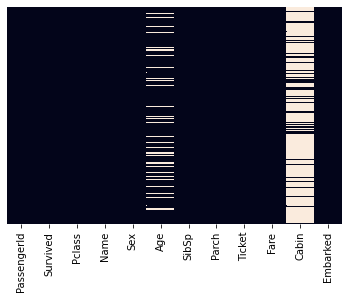

In [31]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

## Correlation between 'Survived'(targe column) and 'Sex' 


In [32]:
corr = train_df[["Survived", "Sex"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [33]:
corr

,Sex,Survived
0,female,0.742038
1,male,0.188908


a. Do you think we should keep this feature?

Yes. using that correlation, we knew that female survived more than male.  (high correlationship between Survive and sex)

## Visualization


countplot for Survived : gender

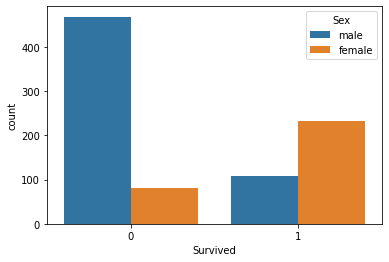

In [34]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

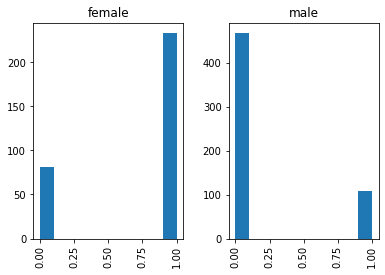

In [35]:
hist=train_df[['Sex','Survived']].hist(by='Sex') 

countplot Survived : class

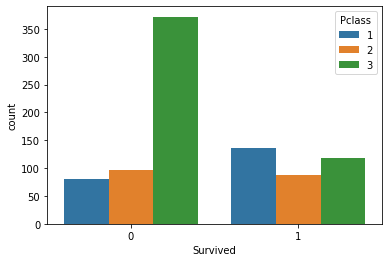

In [36]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

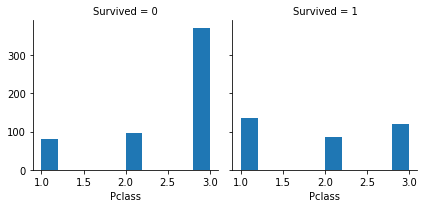

In [37]:
g = sns.FacetGrid(train_df, col='Survived') 
g.map(plt.hist, 'Pclass', bins=10) 

## remove unnecessary data

In [38]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name','Ticket'], axis=1)

In [39]:
train_df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

## encode categorical data 

For Pclass, since it's categorical data, we need to encode it.

In [40]:
pclass_train_dummies = pd.get_dummies(train_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

train_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

train_df = train_df.join(pclass_train_dummies)
test_df = test_df.join(pclass_test_dummies)

For Sex, since it's categorical data, we need to encode it.

In [41]:
sex_train_dummies = pd.get_dummies(train_df['Sex'])
sex_test_dummies = pd.get_dummies(test_df['Sex'])

sex_train_dummies.columns = ['Female', 'Male']
sex_test_dummies.columns = ['Female', 'Male']

train_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

train_df = train_df.join(sex_train_dummies)
test_df = test_df.join(sex_test_dummies)

Because Age has some NaN data, we need to fill the NaN values with the mean value.

In [42]:
train_df["Age"].fillna(train_df["Age"].mean() , inplace=True)
test_df["Age"].fillna(train_df["Age"].mean() , inplace=True)

Because Fare has a NaN data in test dataset, we need to fill them with the mean value.

In [43]:
test_df["Fare"].fillna(test_df['Fare'].mean(), inplace=True)

Since most of Cabin's values are NaN, we can ignored it by deleting the column.

In [44]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

For Embarked, we can fill the NaN values with S(largest) and then encode it once all the NaN values are filled.

In [45]:
train_df["Embarked"].fillna('S', inplace=True)
test_df["Embarked"].fillna('S', inplace=True)


embarked_train_dummies = pd.get_dummies(train_df['Embarked'])
embarked_test_dummies = pd.get_dummies(test_df['Embarked'])

embarked_train_dummies.columns = ['S', 'C', 'Q']
embarked_test_dummies.columns = ['S', 'C', 'Q']

train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

train_df = train_df.join(embarked_train_dummies)
test_df = test_df.join(embarked_test_dummies)

## train/test data split

In [47]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()
Y_test = test_df["PassengerId"]


## Train the model and evaluation (SVM)

In [48]:
from sklearn.svm import SVC, LinearSVC


In [49]:
svc = SVC()

svc.fit(X_train, Y_train)

Y_pred_svc = svc.predict(X_test)

svc.score(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.6868686868686869

In [50]:
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("SVM accuracy is:", acc_svc)

SVM accuracy is: 68.69


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Train the model and evaluation (naive bayes)

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [53]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
nb.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7867564534231201

In [55]:
acc_nb = round(nb.score(X_train, Y_train) * 100, 2)
print("Gaussian Naive Bayes accuracy is:",acc_nb)

Naive Bayes Gaussian accuracy is: 78.68


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [58]:
bern = BernoulliNB()
bern.fit(X_train, Y_train)
Y_pred_be = bern.predict(X_test)
bern.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7755331088664422

In [59]:
acc_bern = round(bern.score(X_train, Y_train) * 100, 2)
print("Bernoulli Naive Bayes accuracy is:",acc_bern)

Naive Bayes Bernoulli accuracy is: 77.55


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [60]:
multi = MultinomialNB()
multi.fit(X_train, Y_train)
Y_pred_mu = multi.predict(X_test)
multi.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.6924803591470258

In [63]:
acc_multi = round(multi.score(X_train, Y_train) * 100, 2)
print("Multinomial Naive Bayes accuracy is:",acc_multi)

Naive Bayes Bernoulli accuracy is: 69.25


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Train the model and evaluation (KNN)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
knn.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.835016835016835

In [66]:
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("KNN accuracy is:",acc_knn)

KNN accuracy is: 83.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Report the confusion_matrix for all the algorithms (SVM, Naïve Bayes, KNN)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
Y_pred_svc = svc.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_bern = bern.predict(X_test)
Y_pred_multi = multi.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Confusion Matrix for SVM

In [77]:
confusion_matrix(Y_test,Y_pred_svc)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

Confusion Matrix for KNN

In [ ]:
print(confusion_matrix(Y_test,Y_pred_knn))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


Confusion Matrix for gaussian naive bayes

In [ ]:
print(confusion_matrix(Y_test,Y_pred_nb))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


Confusion Matrix for bernoulli naive bayes

In [78]:
print(confusion_matrix(Y_test,Y_pred_bern))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


Confusion Matrix for multinomial naive bayes

In [79]:
print(confusion_matrix(Y_test,Y_pred_multi))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
